# Intro to graph theory in *SageMath*

In [1]:
# This is a preamble needed for this to work the same on Python 2 and Python 3
from __future__ import print_function

## Starting from nil

The simplest graph is the empty graph.  It's not very interesting, but it's good to check that some of its basic properties meet our expectations:

In [2]:
g = Graph()

In [3]:
g.order(), g.size()

(0, 0)

Let's add a single vertex:

In [4]:
g.add_vertex(0)

A vertex can be almost any *immutable* object: That is, an object whose value cannot be changed once it's created.  But vertices will typically be an integer or a string (in fact there are some bugs that can occur when it's anything besides that, though those bugs are just oversights since they are uncommon cases; they should be fixed):

In [5]:
g.add_vertex('Ibadan')

In [6]:
g.vertices()

[0, 'Ibadan']

In [7]:
g.order(), g.size()

(2, 0)

Now let's add an edge:

In [8]:
g.add_edge('Ibadan', 0)

If we display the graph object (`g` in this case) it will plot the graph:

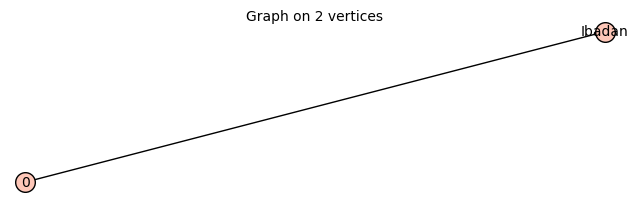

In [9]:
g

Let's add a few more edges with `add_edges`.  If the *vertices* named in the edges don't already exist in the graph they'll be added automatically:

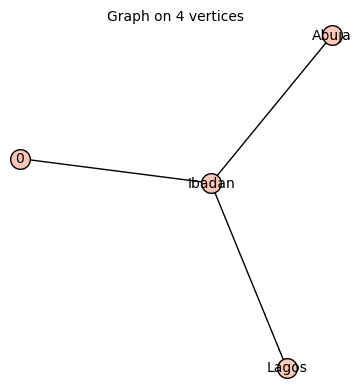

In [10]:
g.add_edges([('Ibadan', 'Lagos'), ('Abuja', 'Ibadan')])
g

(Note: Nobody has bothered yet to make vertices stretch around text labels; this would be a good thing to try to fix if you want to.)

In [11]:
g.order(), g.size()

(4, 3)

Of course, we don't have to always start with an empty graph and then manually add vertices or edges.  We can construct a graph directly from its vertices and/or edges.  For example from a list of edges:

In [12]:
g2 = Graph([(0, 'Ibadan'), ('Lagos', 'Ibadan'), ('Abuja', 'Ibadan')])

Or from a dictionary mapping vertices to their adjacent vertices.  Any redundant information here is simply discarded:

In [13]:
g3 = Graph({
    'Ibadan': [0, 'Lagos', 'Abuja'],
    0: ['Ibadan']  # Redundant; we don't need this
})

Those are just a couple ways of constructing the same graph:

In [14]:
g == g2 == g3

True

There are [several other ways](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph.html#methods) to construct a graph (if you're not online and can't reach that link, you can also try [this one](/kernelspecs/sagemath/doc/reference/graphs/sage/graphs/graph.html#methods)).

Of course, we can also connect unconnected graphs (as well as things like directed graphs, which are outside the scope of this lesson):

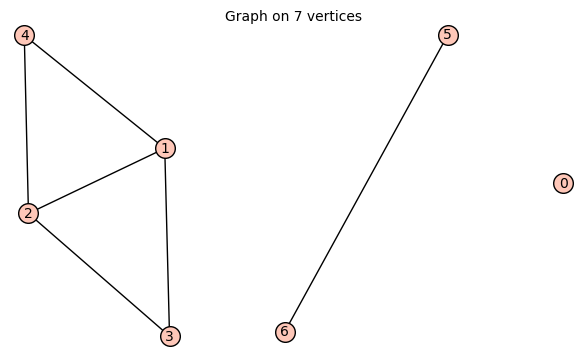

In [15]:
g4 = Graph({
    0: [],
    1: [2, 3, 4],
    2: [1, 3, 4],
    3: [1, 2],
    4: [1, 2],
    5: [6]
})
g4

You can also add edge labels:

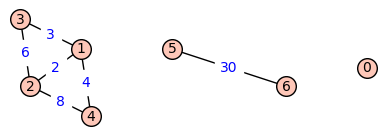

In [16]:
for edge in g4.edges():
    u = edge[0]
    v = edge[1]
    g4.set_edge_label(u, v, u * v)
    
g4.show(edge_labels=True)

Finally, we can also construct random graphs.  For example, to get a random graph $ G_{n,p} $ with $ n $ vertices and probability $ p $ of there being an edge between any pair of vertices:

In [17]:
G = graphs.RandomGNP(12, 2/5)

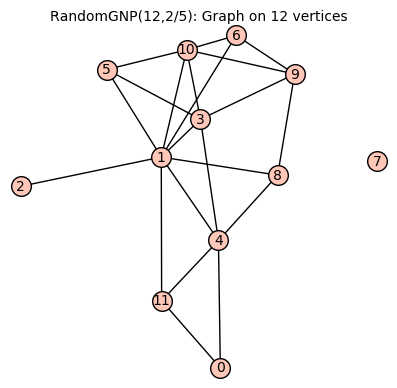

In [18]:
G

### Example
For a fixed graph $ H $, the probability that some $ G_{n,p} $ contains $ H $ as an induced subgraph tends to 1 when $ 0 < p < 1 $ is fixed and $ n $ tends to infinity:

For example, let's try it with the simple Claw graph:

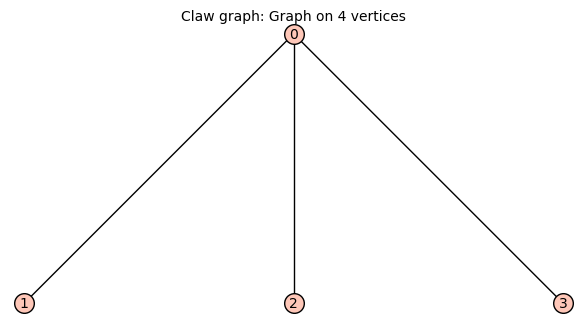

In [19]:
graphs.ClawGraph()

(Incidentally, our earlier graph `g` is obviously isomorphic to the Claw graph):

In [20]:
g.is_isomorphic(graphs.ClawGraph())

True

In [21]:
H = graphs.ClawGraph()
n = 20
p = 2 / 5

def test():
    G_rand = graphs.RandomGNP(n, p)
    # Return True (1) if H is an induced subgraph of G_rand, or False (0)
    # otherwise
    return G_rand.subgraph_search(H, induced=True) is not None

# Add up the number of positive results; for n = 20 it should almost always
# be at least 80% if not higher, and we can push this even further by
# increasing n
sum(test() for _ in range(100)) >= 80

True

There are many other methods for constructing random graphs.  Most (but not all) of them begin with `Random`, so try typing `graphs.Random` and then pressing the `<tab>` key to see them:

## Built-in graphs

Despite the previous examples of direct graph constructions, it's not always that common to manually enumerate the edges and vertices of a graph.  Much of the time it's more efficient to build graphs from common pre-defined components.  We already saw an example of this with `graphs.ClawGraph()` and to an extend `graphs.RandomGNP`.  In fact most of these are in the `graphs` module.  Just for some other examples:

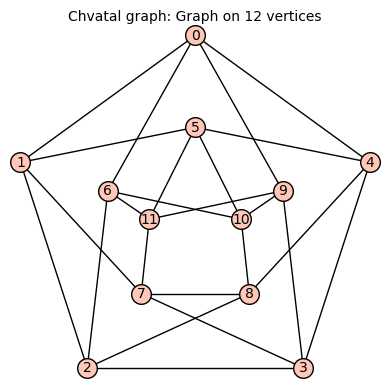

In [22]:
graphs.ChvatalGraph()

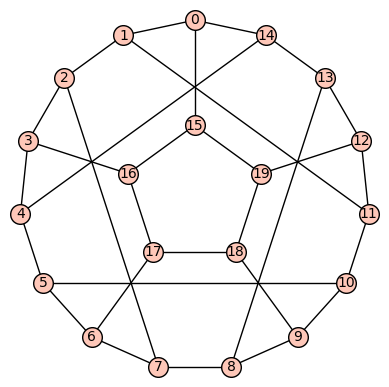

In [23]:
graphs.FlowerSnark().plot()

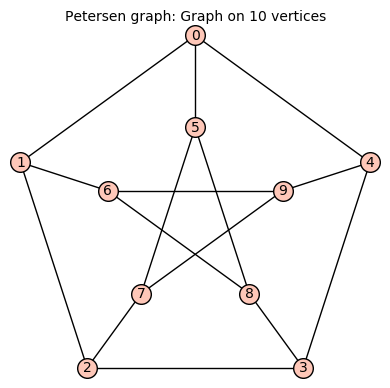

In [24]:
graphs.PetersenGraph()

Many of these graphs appear as counter-examples to certain conjectures, or as smaller graphs satisfying this-or-that property.  The Petersen graph, for example, is non-planar: 

In [25]:
P = graphs.PetersenGraph()
P.is_planar()

False

It contains--simultaneously--two minors forbidden by Kuratowski's theorem ($K_5$ and $K_{3,3}$).  It is a triangle-free graph (its girth is 5):

In [26]:
P.girth()

5

It is 3-regular (all the vertices share the same number of neighbors), and also has chromatic number 3:

In [27]:
P.is_regular(3)

True

In [28]:
P.chromatic_number()

3

Among other interesting properties, each of which can be determined by Sage with corresponding methods, which are invited to explore, in this case by just entering `P.` followed by the `<tab>` key:

Speaking of which, it is also easy to create many other kinds of elementary graphs.  For example:

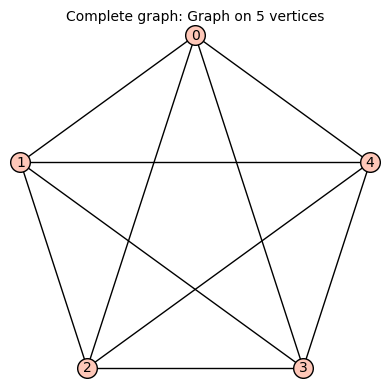

In [29]:
K_5 = graphs.CompleteGraph(5)
K_5

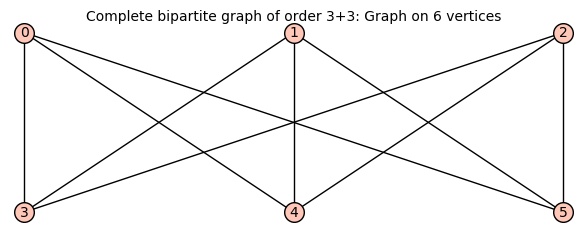

In [30]:
K_3_3 = graphs.CompleteBipartiteGraph(3, 3)
K_3_3

You are invited to explore the other small graphs and families of graphs in the `graphs` package on your own, or propose your own additions!  Adding new graphs is easy, as most of them are just functions that specify the edges, and in some cases some pretty default positionings for plotting the vertices.  To see an example of the source code for one of this, try:

In [31]:
graphs.FlowerSnark??

### Example: Explore cube graph

We can construct the $N$-dimensional cube graph as follows (in this case for $N=3$.

In [32]:
C_3 = graphs.CubeGraph(3)

As with other graphs if we just enter the graph itself as the output of a cell, it will display a plot of the graph:

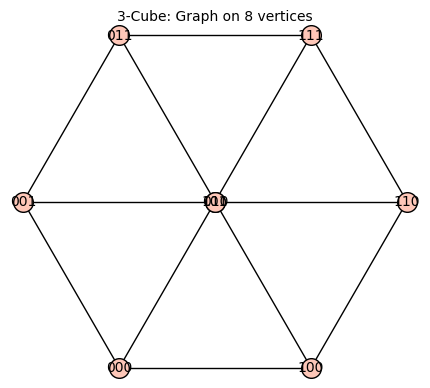

In [33]:
C_3

The default display of the 3-cube isn't great (in fact, this could be easily improved if you would like an idea for a real fix you could work on for Sage! It's a small thing but a very practical and doable project).  The vertices are two small two contain their labels, and it's displaying some isometric view of a cube with two of the vertices overlapping.

After some trial-and-error I found a larger vertex size that's large enough to contain the labels in this case, and played around a bit with other possible layouts so that we can see all the vertices.  Of course, in practice it's not so important to see every vertex in this case, but I just wanted to demonstrate some layout options:

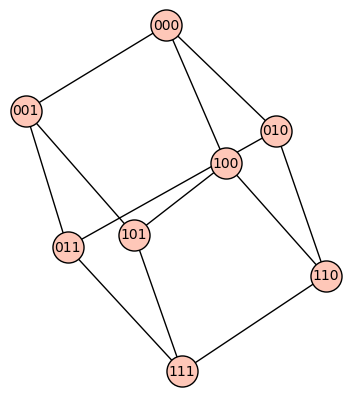

In [34]:
C_3.show(vertex_size=500, layout='spring')

We can also display the graph as an interactive widget.  Unfortunately, this currently opens a new window.  In the future it should be implemented directly in the notebook as a *Jupyter Notebook Widget*.  This is another possible project.

In [35]:
C_3.show(method='js')

And you can show the plot as an interactive 3D plot:

In [36]:
C_3.show3d()  # This is a bit slow and will be improved in the future with ThreeJS support.
              # That would be yet another area for a small project :)

Graphics3d Object

This can work of course for higher-dimensional hypercube graphs.  If you want give `graphs.CubeGraph(4).show3d()` a try--we just didn't put it here because it could be slow on slower machines.

Of course, we can still display the vertices as a list:

In [37]:
C_3.vertices()

['000', '001', '010', '011', '100', '101', '110', '111']

As we can see, the vertices are given as binary values from $ 0 $ to $ 2^N - 1 $.

To get the adjacency matrix:

In [38]:
A = C_3.adjacency_matrix()
A

[0 1 1 0 1 0 0 0]
[1 0 0 1 0 1 0 0]
[1 0 0 1 0 0 1 0]
[0 1 1 0 0 0 0 1]
[1 0 0 0 0 1 1 0]
[0 1 0 0 1 0 0 1]
[0 0 1 0 1 0 0 1]
[0 0 0 1 0 1 1 0]

But let's look at the type of the matrix `A`:

In [39]:
type(A)

<type 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'>

In this case we were given a dense integer matrix.  For a small graph this is fine, but for a very large graph we might want a more compact representation with a sparse matrix:

In [40]:
A_sparse = C_3.adjacency_matrix(sparse=True)

In [41]:
type(A_sparse)

<type 'sage.matrix.matrix_integer_sparse.Matrix_integer_sparse'>

Finally, another we we can create the ajacency matrix from a graph is by using the generic `matrix(<field>, <elements>)` by passing the graph itself as the elements of the matrix.  Furthermore, in this case, we can restrict the elements to those of $ GF(2) $:

In [42]:
A_gf2 = matrix(GF(2), C_3)
A_gf2

[0 1 1 0 1 0 0 0]
[1 0 0 1 0 1 0 0]
[1 0 0 1 0 0 1 0]
[0 1 1 0 0 0 0 1]
[1 0 0 0 0 1 1 0]
[0 1 0 0 1 0 0 1]
[0 0 1 0 1 0 0 1]
[0 0 0 1 0 1 1 0]

In [43]:
type(A_gf2)

<type 'sage.matrix.matrix_mod2_dense.Matrix_mod2_dense'>

In this case the matrix is implemented using a special C library *specifically* designed for efficiently representing and operating on matrices over $ GF(2) $ called [M4RI](https://bitbucket.org/malb/m4ri/src/master/):

> M4RI is a library for fast arithmetic with dense matrices over $ F_2 $. The name M4RI comes from the first implemented algorithm: The "Method of the Four Russians" inversion algorithm published by Gregory Bard. This algorithm in turn is named after the "Method of the Four Russians" multiplication algorithm.

This is just one example of the many specialized technologies underlying Sage, which deserve a callout, and which you can also contribute to (as free, open source projects) if they are subjects you are interested in.

Of course, no matter how the matrix is implemented internally, we can compute the eigenvalues the same way:

In [44]:
print('Eigenvalues of A:', A.eigenvalues(), '\n')
print('Eigenvalues of A_sparse:', A_sparse.eigenvalues(), '\n')
print('Eigenvalues of A_gf2:', A_gf2.eigenvalues())

Eigenvalues of A: [3, -3, 1, 1, 1, -1, -1, -1] 

Eigenvalues of A_sparse: [3, -3, 1, 1, 1, -1, -1, -1] 

Eigenvalues of A_gf2: [1, 1, 1, 1, 1, 1, 1, 1]


But as you can see above, although the interfaces are the same, that does not always mean you will get the same *results*.  When asking for the eigenvalues of `A_gf2` it will not magically convert the matrix to another field; instead they are computed in $ GF(2) $.

We can also skip directly to computing the *spectrum* of the graph, which is just the eigenvalues of its adjacency matrix:

In [45]:
C_3.spectrum()

[3, 1, 1, 1, -1, -1, -1, -3]

They are output in a different order than the ev's we returned previously, but we can check that they are the same:

In [46]:
Set(A.eigenvalues()) == Set(C_3.spectrum())

True

The difference of the order is just because the `spectrum()` method, as you can read by printing its help with:

    C_3.spectrum?
    
returns the eigenvalues in descending order.

### Example: Plan a tournament

Given $ n $ teams competing in a tournament, in which each team must play against each other team, how can you plan all matches in the best way, knowing that several matches can happen on the same day?

This is a typical case of the *proper vertex colouring* of a graph.  Given a graph $ G $, the problem consistes of assigning a color to each edge so that no vertex touches two edges of the same colour.  In other words, find an edge partition into pairings (union of disjoint vertices) of minimum cardinality. We will try to colour the edges of the complete graph of all team pairings.  Fortunately the `sage.graphs.graph_coloring` module has this problem basically solved for us.  We need to *import* this module because it is not part of the standard global functions in Sage:

In [47]:
n = 10
G = graphs.CompleteGraph(n)

from sage.graphs.graph_coloring import edge_coloring

Let's just look first at the output of `edge_coloring`:

In [48]:
edge_coloring(G)

[[(0, 9), (1, 8), (2, 7), (3, 6), (4, 5)],
 [(0, 2), (1, 9), (3, 8), (4, 7), (5, 6)],
 [(0, 4), (1, 3), (2, 9), (5, 8), (6, 7)],
 [(0, 6), (1, 5), (2, 4), (3, 9), (7, 8)],
 [(0, 8), (1, 7), (2, 6), (3, 5), (4, 9)],
 [(0, 1), (2, 8), (3, 7), (4, 6), (5, 9)],
 [(0, 3), (1, 2), (4, 8), (5, 7), (6, 9)],
 [(0, 5), (1, 4), (2, 3), (6, 8), (7, 9)],
 [(0, 7), (1, 6), (2, 5), (3, 4), (8, 9)]]

We see that it gives a list of lists of edges (each `(u, v)` pair is an edge).  This is all the minimal set of all edge partitions described above (in arbitrary order).  We can use this to set the matches for the tournament:

In [49]:
for day, matches in enumerate(edge_coloring(G)):
    print('Matches of day', day + 1, ':', matches)

Matches of day 1 : [(0, 9), (1, 8), (2, 7), (3, 6), (4, 5)]
Matches of day 2 : [(0, 2), (1, 9), (3, 8), (4, 7), (5, 6)]
Matches of day 3 : [(0, 4), (1, 3), (2, 9), (5, 8), (6, 7)]
Matches of day 4 : [(0, 6), (1, 5), (2, 4), (3, 9), (7, 8)]
Matches of day 5 : [(0, 8), (1, 7), (2, 6), (3, 5), (4, 9)]
Matches of day 6 : [(0, 1), (2, 8), (3, 7), (4, 6), (5, 9)]
Matches of day 7 : [(0, 3), (1, 2), (4, 8), (5, 7), (6, 9)]
Matches of day 8 : [(0, 5), (1, 4), (2, 3), (6, 8), (7, 9)]
Matches of day 9 : [(0, 7), (1, 6), (2, 5), (3, 4), (8, 9)]


We can use the `.show()` method on the graph to set properties of how it's displayed (if we want to change some of the default display properties that are used when we display the graph *without* `.show()`).  For example, one of the display properties we can set is colors for the edges.  Here we can use our edge colorings.  In this case, any edge with the same color represents a match occurring on the same day.  To do this we use the `hex_colors` argument to `edge_coloring` to assign an arbitrary color to each edge partition:

In [50]:
edge_coloring(G, hex_colors=True)

{'#0000ff': [(0, 3), (1, 2), (4, 8), (5, 7), (6, 9)],
 '#00a9ff': [(0, 1), (2, 8), (3, 7), (4, 6), (5, 9)],
 '#00ff00': [(0, 6), (1, 5), (2, 4), (3, 9), (7, 8)],
 '#00ffa9': [(0, 8), (1, 7), (2, 6), (3, 5), (4, 9)],
 '#aa00ff': [(0, 5), (1, 4), (2, 3), (6, 8), (7, 9)],
 '#aaff00': [(0, 4), (1, 3), (2, 9), (5, 8), (6, 7)],
 '#ff0000': [(0, 9), (1, 8), (2, 7), (3, 6), (4, 5)],
 '#ff00aa': [(0, 7), (1, 6), (2, 5), (3, 4), (8, 9)],
 '#ffaa00': [(0, 2), (1, 9), (3, 8), (4, 7), (5, 6)]}

Now putting it all together:

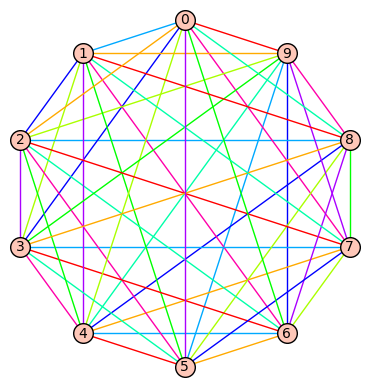

In [51]:
G.show(edge_colors=edge_coloring(G, hex_colors=True))